### Preprocessing

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd

In [12]:
#Reading CSV file generated by our code
df_target=pd.read_csv('/content/drive/MyDrive/ML Lab Data/target checkpoint/dataset_target.csv')
df_target.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007


In [13]:
#Adding feature Moving Average
df_target['Moving_av']= df_target['Adj Close'].rolling(window=20,min_periods=0).mean()
df_target.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992


In [14]:
#Adding feature upper_volatility and lower_volatility
i=1
upper_volatility=[df_target.iloc[0]['Moving_av']] 
lower_volatility=[df_target.iloc[0]['Moving_av']] 
while i<len(df_target):
    upper_volatility.append(df_target.iloc[i-1]['Moving_av']+3/100*df_target.iloc[i-1]['Moving_av'])
    lower_volatility.append(df_target.iloc[i-1]['Moving_av']-3/100*df_target.iloc[i-1]['Moving_av'])
    i+=1

df_target['Upper_volatility'] = upper_volatility
df_target['Lower_volatility'] = lower_volatility

df_target.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012,948.950012,948.950012
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004,977.418513,920.481512
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994,976.733554,919.836454
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488,981.219194,924.060794
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992,982.591663,925.353314


In [15]:
#Adding Features Short_resistance, Short_support, Long_resistance, Long_support

df_target['Short_resistance']= df_target['High'].rolling(window=10,min_periods=0).max()

df_target['Short_support']= df_target['Low'].rolling(window=10,min_periods=0).min()

df_target['Long_resistance']= df_target['High'].rolling(window=50,min_periods=0).max()

df_target['Long_support']= df_target['Low'].rolling(window=50,min_periods=0).min()

df_target.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012,948.950012,948.950012,953.750000,945.000000,953.750000,945.000000
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004,977.418513,920.481512,953.750000,940.780029,953.750000,940.780029
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994,976.733554,919.836454,962.789978,940.780029,962.789978,940.780029
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488,981.219194,924.060794,963.150024,940.780029,963.150024,940.780029
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992,982.591663,925.353314,970.059998,940.780029,970.059998,940.780029


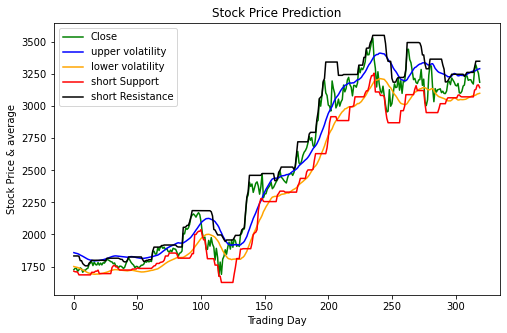

In [16]:
#Visulization of our Added Features 

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(list(df_target.iloc[600:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'red', label = 'average')
plt.plot(list(df_target.iloc[600:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df_target.iloc[600:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df_target.iloc[600:]['Short_support']), color = 'red', label = 'short Support')
plt.plot(list(df_target.iloc[600:]['Short_resistance']), color = 'black', label = 'short Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

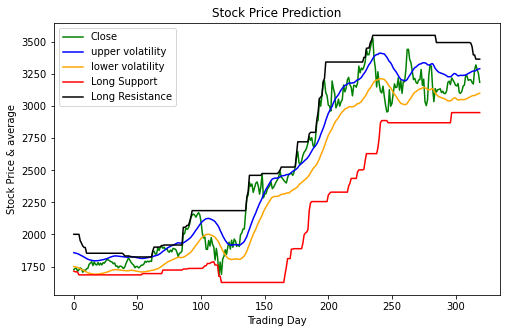

In [17]:
#Visulization of our Added Features 

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(list(df_target.iloc[600:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_target.iloc[600:]['Moving_av']), color = 'red', label = 'average')
plt.plot(list(df_target.iloc[600:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df_target.iloc[600:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df_target.iloc[600:]['Long_support']), color = 'red', label = 'Long Support')
plt.plot(list(df_target.iloc[600:]['Long_resistance']), color = 'black', label = 'Long Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

In [18]:
#Generating CSV File of our prepared dataset
df_target.to_csv('dataset_prepared.csv', index=False)

### Adding Trends

In [19]:
import pandas as pd

#Reading Dataset Prepared by our code
df_main=pd.read_csv('dataset_prepared.csv')

df_main.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012,948.950012,948.950012,953.750000,945.000000,953.750000,945.000000
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004,977.418513,920.481512,953.750000,940.780029,953.750000,940.780029
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994,976.733554,919.836454,962.789978,940.780029,962.789978,940.780029
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488,981.219194,924.060794,963.150024,940.780029,963.150024,940.780029
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992,982.591663,925.353314,970.059998,940.780029,970.059998,940.780029


In [20]:
#Reading Trends Downloaded from Google Trends
df_trends=pd.read_csv('/content/drive/MyDrive/ML Lab Data/target checkpoint/amazon_trends.csv')

df_trends.head()

,Week,Amazon.com: (Worldwide)
0,2016-01-10,50
1,2016-01-17,52
2,2016-01-24,50
3,2016-01-31,48
4,2016-02-07,48


In [21]:
#Taking Appropriate subset of Google Trends data according to our Prepared Data

import datetime 

dates=[]
i=0
while i<len(df_trends):
    dates.append(datetime.date(int(df_trends.iloc[i]['Week'].split('-')[0]),int(df_trends.iloc[i]['Week'].split('-')[1]),int(df_trends.iloc[i]['Week'].split('-')[2])))
    i+=1

df_trends['date'] = dates

df_trends_req = df_trends[df_trends['date']>datetime.date(2017,5,5)]

df_trends_req.head()

,Week,Amazon.com: (Worldwide),date
69,2017-05-07,59,2017-05-07
70,2017-05-14,55,2017-05-14
71,2017-05-21,54,2017-05-21
72,2017-05-28,55,2017-05-28
73,2017-06-04,55,2017-06-04


In [22]:
#Refactoring Google Trends data (Per week data to Per day data)
days=[]
trend=[]

i=0
while i<len(df_trends_req):
    day=df_trends_req.iloc[i]['date']
    #trend.append(df_trends_req.iloc[i]['Amazon.com: (Worldwide)'])
    dates=[dates for dates in (day - datetime.timedelta(n) for n in range(7))]
    
    dates.reverse()
    #print(dates)
    j=0
    while j<len(dates):
        #print(dates[j])
        days.append(dates[j])
        trend.append(df_trends_req.iloc[i]['Amazon.com: (Worldwide)'])
        j+=1
    i+=1

df_trend_final=pd.DataFrame(list(zip(days,trend)), columns=['Date','trend_hit'])

df_trend_final.head()

,Date,trend_hit
0,2017-05-01,59
1,2017-05-02,59
2,2017-05-03,59
3,2017-05-04,59
4,2017-05-05,59


In [23]:
#Generating CSV File of our prepared dataset
df_trend_final.to_csv('Trends_preprocessed.csv',index=False)

In [24]:
#Reading file generated by our code
df_trend_final=pd.read_csv('Trends_preprocessed.csv')

df_trend_final.head()

,Date,trend_hit
0,2017-05-01,59
1,2017-05-02,59
2,2017-05-03,59
3,2017-05-04,59
4,2017-05-05,59


In [25]:
len(df_main)

920

In [26]:
#Merging our 2 data sets based on common key Date
df_2=pd.merge(df_main,df_trend_final,how="inner",on="Date")

df_2.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,trend_hit
914,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,3178.257007,3274.242294,3083.509733,3263.510010,3072.820068,3399.659912,2950.120117,85
915,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,3182.688000,3273.604717,3082.909297,3304.000000,3126.000000,3399.659912,2950.120117,88
916,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,3190.385999,3278.168641,3087.207360,3350.649902,3130.489990,3366.800049,2950.120117,88
917,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,3193.674500,3286.097578,3094.674419,3350.649902,3163.679932,3366.800049,2950.120117,88
918,2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2954100,3256.929932,3196.344495,3289.484734,3097.864265,3350.649902,3166.000000,3366.800049,2950.120117,88


### Adding Indicators

In [27]:
#Reading Dow_Jones and S&P 500 data from web site : (https://www.macrotrends.net/)
df_dj=pd.read_csv('/content/drive/MyDrive/ML Lab Data/target checkpoint/dow_jones.csv')
df_sp=pd.read_csv('/content/drive/MyDrive/ML Lab Data/target checkpoint/sp500.csv')

#Merging our Data sets based on common key Date
df_dj_n_sp=pd.merge(df_dj,df_sp,how="inner",on="date")

df_dj_n_sp.head()

,date,value_x,value_y
0,2008-01-07,12827.49,1416.18
1,2008-01-08,12589.07,1390.19
2,2008-01-09,12735.31,1409.13
3,2008-01-10,12853.09,1420.33
4,2008-01-11,12606.30,1401.02


In [28]:
#Renaming Columns
df_dj_n_sp.columns=['Date','Dow_jones','snp500']
df_dj_n_sp.head()

,Date,Dow_jones,snp500
0,2008-01-07,12827.49,1416.18
1,2008-01-08,12589.07,1390.19
2,2008-01-09,12735.31,1409.13
3,2008-01-10,12853.09,1420.33
4,2008-01-11,12606.30,1401.02


In [29]:
#Merging our Data sets based on common key Date
df_3=pd.merge(df_2,df_dj_n_sp,how="inner",on="Date")

df_3.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,trend_hit,Dow_jones,snp500
912,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,3178.257007,3274.242294,3083.509733,3263.510010,3072.820068,3399.659912,2950.120117,85,30199.87,3703.06
913,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,3182.688000,3273.604717,3082.909297,3304.000000,3126.000000,3399.659912,2950.120117,88,30403.97,3735.36
914,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,3190.385999,3278.168641,3087.207360,3350.649902,3130.489990,3366.800049,2950.120117,88,30335.67,3727.04
915,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,3193.674500,3286.097578,3094.674419,3350.649902,3163.679932,3366.800049,2950.120117,88,30409.56,3732.04
916,2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2954100,3256.929932,3196.344495,3289.484734,3097.864265,3350.649902,3166.000000,3366.800049,2950.120117,88,30606.48,3756.07


In [30]:
len(df_3)

917

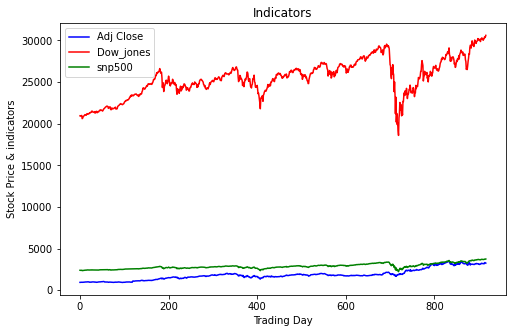

In [31]:
#Visulizing our target stocks Adj Close vs Indicators : Dow and S&P
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'blue', label = 'Adj Close')
plt.plot(list(df_3.iloc[:]['Dow_jones']), color = 'red', label = 'Dow_jones')
plt.plot(list(df_3.iloc[:]['snp500']), color = 'green', label = 'snp500')

plt.title('Indicators')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & indicators')
plt.legend()
plt.show()

In [32]:
#Generating CSV File of our prepared dataset
df_3.to_csv('Without_News.csv',index=False)
df_3 = pd.read_csv('Without_News.csv')

In [33]:
#Taking 10 other stocks tickers which affects our target stock most

import os

fldr="/content/drive/MyDrive/ML Lab Data/target checkpoint/Relevant"

files=os.listdir(fldr)

tickers=[file[:-4] for file in files]

tickers

['A', 'AJG', 'APD', 'BF-B', 'CHD', 'CPRT', 'CTAS', 'HUM', 'INFO', 'MKTX']

In [34]:
#Reading data set created by our code
df_temp=pd.read_csv('/content/drive/MyDrive/ML Lab Data/target checkpoint/Dataset_temp.csv')

df_temp = df_temp [:919]

tickers.insert(0,'Date')

df_tickers=df_temp[tickers]

df_4=pd.merge(df_3,df_tickers,how="inner",on="Date")

df_4.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,trend_hit,Dow_jones,snp500,A,AJG,APD,BF-B,CHD,CPRT,CTAS,HUM,INFO,MKTX
912,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,3178.257007,3274.242294,3083.509733,3263.510010,3072.820068,3399.659912,2950.120117,85,30199.87,3703.06,117.117928,123.419998,267.023590,78.029999,86.860001,123.709999,338.399994,404.209930,86.370003,573.080017
913,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,3182.688000,3273.604717,3082.909297,3304.000000,3126.000000,3399.659912,2950.120117,88,30403.97,3735.36,117.637077,123.029999,267.272369,78.349998,87.480003,126.720001,354.190002,409.561737,86.940002,565.770020
914,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,3190.385999,3278.168641,3087.207360,3350.649902,3130.489990,3366.800049,2950.120117,88,30335.67,3727.04,117.038063,121.529999,267.401733,78.940002,87.080002,125.919998,347.369995,407.424988,88.029999,564.789978
915,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,3193.674500,3286.097578,3094.674419,3350.649902,3163.679932,3366.800049,2950.120117,88,30409.56,3732.04,117.197800,121.699997,269.760010,78.680000,86.709999,126.540001,350.230011,406.109985,88.519997,562.270020
916,2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2954100,3256.929932,3196.344495,3289.484734,3097.864265,3350.649902,3166.000000,3366.800049,2950.120117,88,30606.48,3756.07,118.295998,123.709999,273.220001,79.430000,87.230003,127.250000,353.459991,410.269989,89.830002,570.559998


In [35]:
len(df_4)

917

In [36]:
#Generating CSV File of our prepared dataset
df_4.to_csv('included_tickers.csv',index=False)

### Adding News

In [37]:
#Reading News file scraped from site : (https://seekingalpha.com/symbol/AMZN/analysis)
df_news = pd.read_excel('/content/drive/MyDrive/ML Lab Data/target checkpoint/News_articles_2.xlsx')

df_news.head()

,News
0,Amazon Signals Shift In 2021 Focus Following P...
1,"Editors' PickThe Entertainment OracleTue, Dec...."
2,Amazon: How Amazon Wins
3,"John M. MasonSun, Dec. 27, 2020118 Comments"
4,Amazon - How I Handle This Company As A DGR In...


In [38]:
#Refactoring News data from Per Month to Per Date
months=['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.']
i=0
news=[]
date=[]
while i<len(df_news):
    if i%2==0:
        news.append(df_news.iloc[i]['News'])
    else:
        words=df_news.iloc[i]['News'].split(' ')
        for word in words:
            if word in months:
                month=months.index(word)+1
                
            if word[:-1].isnumeric():
                if int(word[:-1])<32:
                    day=int(word[:-1])
                else:
                    year=int(word[:4])
        #print(str(day)+'/'+str(month)+'/'+str(year))
        day_n=datetime.date(year,month,day)
        date.append(day_n)
    i+=1

df_news=pd.DataFrame(list(zip(news,date)),columns=['News','Date'])

df_news.head()

,News,Date
0,Amazon Signals Shift In 2021 Focus Following P...,2020-12-29
1,Amazon: How Amazon Wins,2020-12-27
2,Amazon - How I Handle This Company As A DGR In...,2020-12-23
3,"Amazon Fresh Stores Are Going After Aldi, Not ...",2020-12-16
4,"Why A $4,000 Price Tag For Amazon Is Realistic",2020-12-14


In [39]:
df_news=df_news.sort_values(by=['Date'])
df_news.head()

,News,Date
875,Whole Foods: Flaws Mount,2017-05-11
874,"Amazon Fire Is Cooling Off, And It May Threate...",2017-05-12
872,Amazon Web Services: $190 Billion Valuation,2017-05-15
873,Whole Foods Is Irrationally Exuberant,2017-05-15
871,"AWS Will Take Amazon's Stock Price Past $1,000",2017-05-15


In [40]:
!pip install twython
!pip install nltk

In [41]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [42]:
#Applying Sentiment Analyzer to get the sentiment of our news data

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores=df_news['News'].apply(analyzer.polarity_scores).tolist()
scores_df=pd.DataFrame(scores)

scores_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.307,0.429,0.264,-0.1779
2,0.000,0.746,0.254,0.1779
3,0.277,0.319,0.404,0.2960
4,0.000,1.000,0.000,0.0000


In [43]:
df_news_final=pd.concat([df_news,scores_df],axis=1)
df_news_final

,News,Date,neg,neu,pos,compound
0,Amazon Signals Shift In 2021 Focus Following P...,2020-12-29,0.000,1.000,0.000,0.0000
1,Amazon: How Amazon Wins,2020-12-27,0.307,0.429,0.264,-0.1779
2,Amazon - How I Handle This Company As A DGR In...,2020-12-23,0.000,0.746,0.254,0.1779
3,"Amazon Fresh Stores Are Going After Aldi, Not ...",2020-12-16,0.277,0.319,0.404,0.2960
4,"Why A $4,000 Price Tag For Amazon Is Realistic",2020-12-14,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
871,"AWS Will Take Amazon's Stock Price Past $1,000",2017-05-15,0.000,0.805,0.195,0.1779
872,Amazon Web Services: $190 Billion Valuation,2017-05-15,0.000,0.800,0.200,0.4588
873,Whole Foods Is Irrationally Exuberant,2017-05-15,0.000,0.805,0.195,0.1779
874,"Amazon Fire Is Cooling Off, And It May Threate...",2017-05-12,0.000,0.123,0.877,0.7269


In [44]:
df_news_final=df_news_final.drop(['News'],axis=1)
df_news_final

,Date,neg,neu,pos,compound
0,2020-12-29,0.000,1.000,0.000,0.0000
1,2020-12-27,0.307,0.429,0.264,-0.1779
2,2020-12-23,0.000,0.746,0.254,0.1779
3,2020-12-16,0.277,0.319,0.404,0.2960
4,2020-12-14,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
871,2017-05-15,0.000,0.805,0.195,0.1779
872,2017-05-15,0.000,0.800,0.200,0.4588
873,2017-05-15,0.000,0.805,0.195,0.1779
874,2017-05-12,0.000,0.123,0.877,0.7269


In [45]:
mean_scores = df_news_final.groupby(['Date']).mean()
mean_scores

,neg,neu,pos,compound
Date,,,,
2017-05-11,0.000,0.825000,0.175000,0.177900
2017-05-12,0.000,0.123000,0.877000,0.726900
2017-05-15,0.000,0.803333,0.196667,0.271533
2017-05-17,0.000,0.655750,0.344250,0.408625
2017-05-18,0.000,0.562000,0.438000,0.440400
...,...,...,...,...
2020-12-14,0.000,0.870500,0.129500,0.210750
2020-12-16,0.277,0.319000,0.404000,0.296000
2020-12-23,0.000,0.746000,0.254000,0.177900


In [46]:
mean_scores=mean_scores.reset_index()
mean_scores.head()

,Date,neg,neu,pos,compound
0,2017-05-11,0.0,0.825000,0.175000,0.177900
1,2017-05-12,0.0,0.123000,0.877000,0.726900
2,2017-05-15,0.0,0.803333,0.196667,0.271533
3,2017-05-17,0.0,0.655750,0.344250,0.408625
4,2017-05-18,0.0,0.562000,0.438000,0.440400


In [47]:
mean_scores.to_csv('Final_news.csv',index=False)
df_main=pd.read_csv('included_tickers.csv')
df_main.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,trend_hit,Dow_jones,snp500,A,AJG,APD,BF-B,CHD,CPRT,CTAS,HUM,INFO,MKTX
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012,948.950012,948.950012,953.750000,945.000000,953.750000,945.000000,55,20943.11,2399.63,54.481506,50.906693,132.025391,36.706463,48.258198,30.170000,116.400665,224.781387,43.055977,183.680359
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004,977.418513,920.481512,953.750000,940.780029,953.750000,940.780029,55,20919.42,2394.44,54.442787,50.585552,130.761948,36.974762,48.068459,29.920000,117.455017,224.713196,43.055977,183.846283
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994,976.733554,919.836454,962.789978,940.780029,962.789978,940.780029,55,20896.61,2390.90,54.375004,50.218517,130.952820,36.669197,47.801838,29.889999,117.224976,225.940338,42.818104,181.952484
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488,981.219194,924.060794,963.150024,940.780029,963.150024,940.780029,54,20981.94,2402.32,54.897842,50.640598,131.870834,36.870426,47.849445,29.980000,117.292068,225.083313,43.343414,183.904877
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992,982.591663,925.353314,970.059998,940.780029,970.059998,940.780029,54,20979.75,2400.67,55.023720,50.750713,131.207336,37.608280,47.116230,29.969999,117.483765,220.301315,43.472267,180.322250


In [48]:
#Reading File Generated by our Code
df_news=pd.read_csv('Final_news.csv')
df_news.head()

,Date,neg,neu,pos,compound
0,2017-05-11,0.0,0.825000,0.175000,0.177900
1,2017-05-12,0.0,0.123000,0.877000,0.726900
2,2017-05-15,0.0,0.803333,0.196667,0.271533
3,2017-05-17,0.0,0.655750,0.344250,0.408625
4,2017-05-18,0.0,0.562000,0.438000,0.440400


In [49]:
df_5=pd.merge(df_main,df_news,how="left",on="Date")
df_5.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,trend_hit,Dow_jones,snp500,A,AJG,APD,BF-B,CHD,CPRT,CTAS,HUM,INFO,MKTX,neg,neu,pos,compound
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012,948.950012,948.950012,953.750000,945.000000,953.750000,945.000000,55,20943.11,2399.63,54.481506,50.906693,132.025391,36.706463,48.258198,30.170000,116.400665,224.781387,43.055977,183.680359,NaN,NaN,NaN,NaN
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004,977.418513,920.481512,953.750000,940.780029,953.750000,940.780029,55,20919.42,2394.44,54.442787,50.585552,130.761948,36.974762,48.068459,29.920000,117.455017,224.713196,43.055977,183.846283,0.0,0.825000,0.175000,0.177900
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994,976.733554,919.836454,962.789978,940.780029,962.789978,940.780029,55,20896.61,2390.90,54.375004,50.218517,130.952820,36.669197,47.801838,29.889999,117.224976,225.940338,42.818104,181.952484,0.0,0.123000,0.877000,0.726900
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488,981.219194,924.060794,963.150024,940.780029,963.150024,940.780029,54,20981.94,2402.32,54.897842,50.640598,131.870834,36.870426,47.849445,29.980000,117.292068,225.083313,43.343414,183.904877,0.0,0.803333,0.196667,0.271533
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992,982.591663,925.353314,970.059998,940.780029,970.059998,940.780029,54,20979.75,2400.67,55.023720,50.750713,131.207336,37.608280,47.116230,29.969999,117.483765,220.301315,43.472267,180.322250,NaN,NaN,NaN,NaN


In [50]:
len(df_5)

917

In [51]:
df_6=df_5.fillna(0.0)
df_6.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,trend_hit,Dow_jones,snp500,A,AJG,APD,BF-B,CHD,CPRT,CTAS,HUM,INFO,MKTX,neg,neu,pos,compound
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012,948.950012,948.950012,948.950012,953.750000,945.000000,953.750000,945.000000,55,20943.11,2399.63,54.481506,50.906693,132.025391,36.706463,48.258198,30.170000,116.400665,224.781387,43.055977,183.680359,0.0,0.000000,0.000000,0.000000
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995,948.285004,977.418513,920.481512,953.750000,940.780029,953.750000,940.780029,55,20919.42,2394.44,54.442787,50.585552,130.761948,36.974762,48.068459,29.920000,117.455017,224.713196,43.055977,183.846283,0.0,0.825000,0.175000,0.177900
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976,952.639994,976.733554,919.836454,962.789978,940.780029,962.789978,940.780029,55,20896.61,2390.90,54.375004,50.218517,130.952820,36.669197,47.801838,29.889999,117.224976,225.940338,42.818104,181.952484,0.0,0.123000,0.877000,0.726900
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971,953.972488,981.219194,924.060794,963.150024,940.780029,963.150024,940.780029,54,20981.94,2402.32,54.897842,50.640598,131.870834,36.870426,47.849445,29.980000,117.292068,225.083313,43.343414,183.904877,0.0,0.803333,0.196667,0.271533
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007,956.391992,982.591663,925.353314,970.059998,940.780029,970.059998,940.780029,54,20979.75,2400.67,55.023720,50.750713,131.207336,37.608280,47.116230,29.969999,117.483765,220.301315,43.472267,180.322250,0.0,0.000000,0.000000,0.000000


In [52]:
df_6.to_csv('Final_preprocessed.csv',index=False)
df_main=pd.read_csv('Final_preprocessed.csv')

len(df_main.columns)

31

### RNN_data Handling

In [53]:
RNN_data_cols=['High','Low','Open','Close','Volume','Adj Close','Moving_av']

Regression_data_cols=['Upper_volatility','Lower_volatility','Short_resistance','Short_support','Long_resistance','Long_support','trend_hit','Dow_jones','snp500','compound','neg','neu','pos','BF-B','CTAS','CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

print(f'\n{len(RNN_data_cols)}\n')

RNN_data=df_main[RNN_data_cols]
Regression_data=df_main[Regression_data_cols]


7



In [ ]:
### Modelling

In [54]:
Target_column=['Adj Close']

In [55]:
df_target=df_main[Target_column]

In [56]:
df_target_n=df_main[Target_column].values

In [57]:
RNN_data_n=df_main[RNN_data_cols].values

In [58]:
RNN_data_n.shape

(917, 7)

In [59]:
Regression_data=df_main[Regression_data_cols].values

In [60]:
import numpy as np
RNN_train = []
y_train = []
for i in range(20,len(RNN_data_n)):
    RNN_train.append(RNN_data_n[i-20:i,:])
    y_train.append(df_target_n[i,:])
    
RNN_train, y_train = np.array(RNN_train), np.array(y_train)


In [61]:
RNN_train.shape

(897, 20, 7)

In [62]:
y_train.shape

(897, 1)

In [63]:
RNN_test = RNN_train[725:]
y_test = y_train[725:]

RNN_train = RNN_train[:800]
y_train = y_train[:800]
RNN_test.shape

(172, 20, 7)

In [64]:
RNN_train.shape

(800, 20, 7)

In [65]:
y_train.shape

(800, 1)

In [66]:
Regression_data=df_main[Regression_data_cols]

In [67]:
Regression_data_2=Regression_data[20:]

In [68]:
Regression_train=Regression_data_2.values

In [69]:
Regression_train.shape

(897, 23)

In [70]:
Regression_test = Regression_train[725:]
Regression_test.shape

(172, 23)

In [71]:
Regression_train = Regression_train[:800]
Regression_train.shape

(800, 23)

### Modelling

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Input
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.layers import Dropout,add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [73]:
def model():
    inputs_RNN=Input(RNN_train.shape[1:])
    lstm_1=LSTM(units = 64, return_sequences = True)(inputs_RNN)
    dr1=Dropout(0.2)(lstm_1)
    lstm_2=LSTM(units = 64, return_sequences = True)(dr1)
    dr2=Dropout(0.2)(lstm_2)
    lstm_3=LSTM(units = 128)(dr2)
    dense_out=Dense(32,activation='relu')(lstm_3)
    
    inputs_regress=Input(Regression_train.shape[1:])
    dense_0=Dense(32,activation='relu')(inputs_regress)
    added=add([dense_0,dense_out])
    dense_1=Dense(128,activation='relu')(added)
    dense_2=Dense(128,activation='relu')(dense_1)
    dense_3=Dense(256,activation='relu')(dense_2)
    output=Dense(1,activation='linear')(dense_3)
    
    mdl= Model(inputs=[inputs_RNN,inputs_regress],outputs=[output])
    
    mdl.summary()
    
    mdl.compile(loss="mean_absolute_error", optimizer="Adam")
    
    return mdl

In [74]:
Model=model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 7)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 20, 64)       18432       ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 20, 64)       0           ['lstm[0][0]']                   
                                                                                                  
 lstm_1 (LSTM)                  (None, 20, 64)       33024       ['dropout[0][0]']                
                                                                                              

In [75]:
import tensorflow as tf
name_to_save='model_total.h5'
callback_mc=tf.keras.callbacks.ModelCheckpoint(filepath=name_to_save,
                                           monitor='loss',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='min',
                                           save_freq='epoch')
    
callback_es=tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=30, verbose=0,mode='min', baseline=None, restore_best_weights=False)
    

Model.fit([RNN_train,Regression_train], y_train, epochs = 100, batch_size = 32,callbacks=[callback_mc,callback_es])

Epoch 1/100
25/25 [==============================] - 6s 50ms/step - loss: 445.6480
Epoch 2/100
 3/25 [==>...........................] - ETA: 0s - loss: 258.7171

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


25/25 [==============================] - 1s 49ms/step - loss: 170.4464
Epoch 3/100
25/25 [==============================] - 1s 47ms/step - loss: 78.4753
Epoch 4/100
25/25 [==============================] - 1s 46ms/step - loss: 100.0649
Epoch 5/100
25/25 [==============================] - 1s 46ms/step - loss: 63.1106
Epoch 6/100
25/25 [==============================] - 1s 45ms/step - loss: 65.3968
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 66.0359
Epoch 8/100
25/25 [==============================] - 1s 46ms/step - loss: 54.0094
Epoch 9/100
25/25 [==============================] - 1s 46ms/step - loss: 54.7317
Epoch 10/100
25/25 [==============================] - 1s 45ms/step - loss: 54.4392
Epoch 11/100
25/25 [==============================] - 1s 43ms/step - loss: 70.5649
Epoch 12/100
25/25 [==============================] - 1s 44ms/step - loss: 79.9040
Epoch 13/100
25/25 [==============================] - 1s 45ms/step - loss: 70.0114
Epoch 14/100
25/25 [==

In [76]:
predicted=Model.predict([RNN_test,Regression_test])

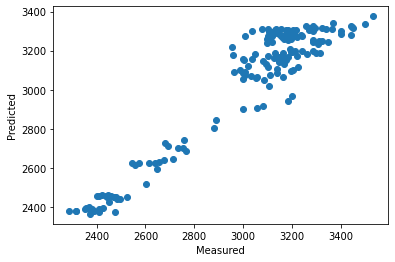

In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test[0].min(),y_test[0].max()], [y_test[0].min(), y_test[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

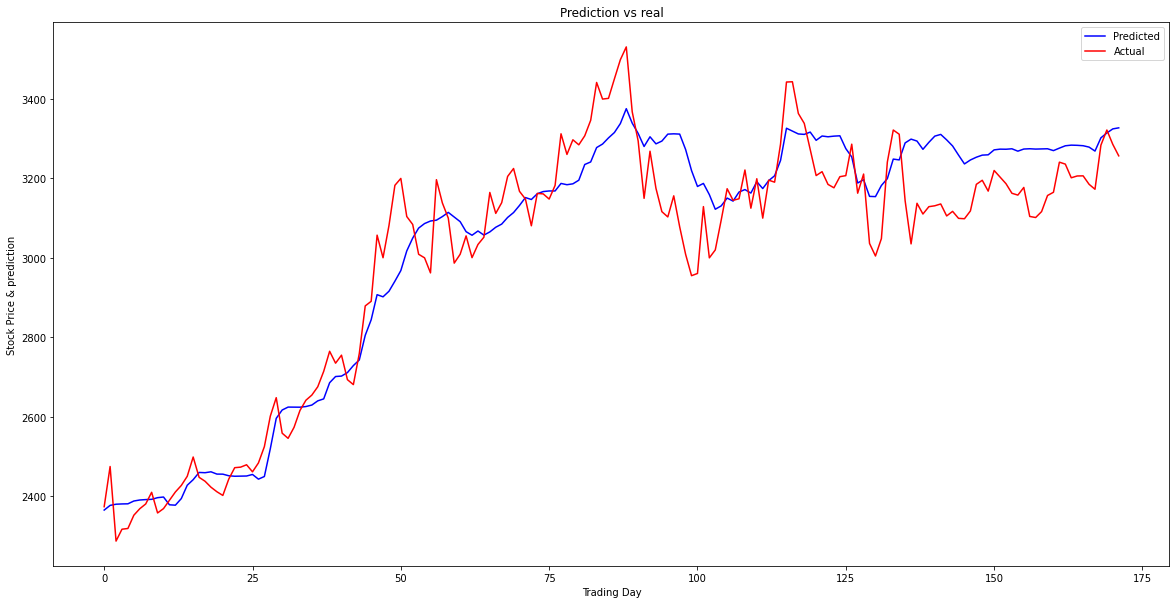

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
plt.plot(predicted, color = 'blue', label = 'Predicted')
plt.plot(y_test, color = 'red', label = 'Actual')

plt.title('Prediction vs real')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & prediction')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,predicted))

MAE 80.23178029614826


In [80]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,predicted)))

MSE 10096.378860163828
RMSE 100.48073875208038


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicted)
print(r2)

0.8992209302200543


In [82]:
#For Train Dataset
predicted=Model.predict([RNN_train,Regression_train])

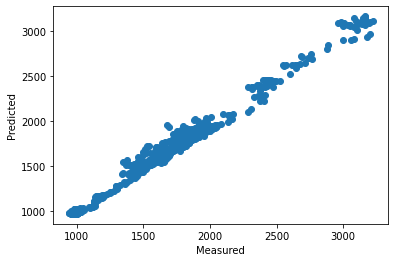

In [83]:
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train[0].min(),y_train[0].max()], [y_train[0].min(), y_train[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

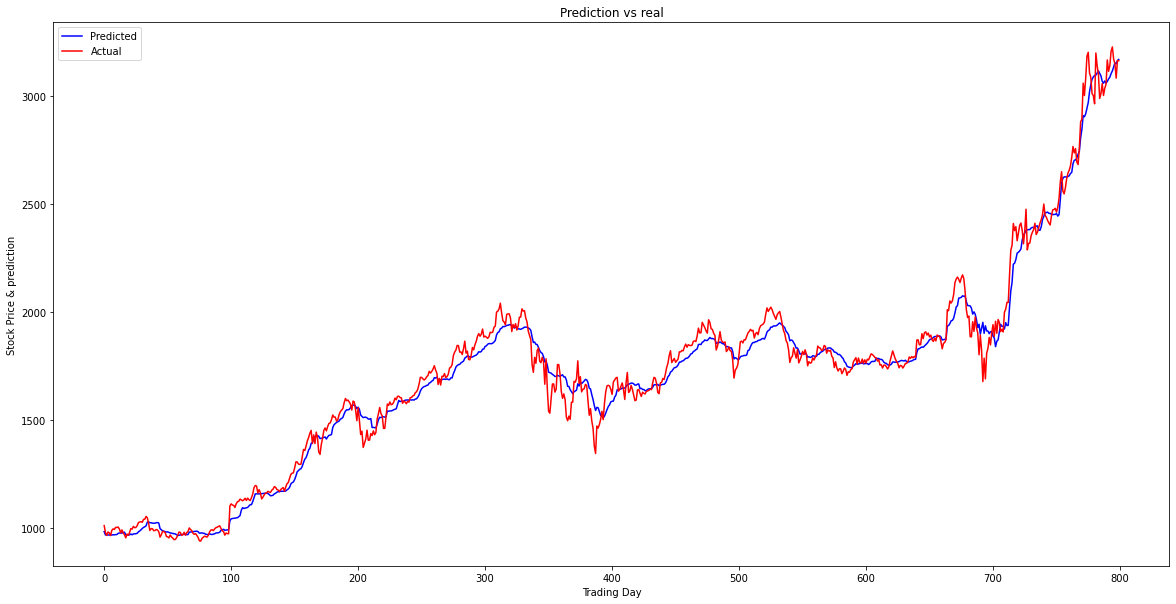

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
plt.plot(predicted, color = 'blue', label = 'Predicted')
plt.plot(y_train, color = 'red', label = 'Actual')

plt.title('Prediction vs real')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & prediction')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_train,predicted))

MAE 43.96755264282226


In [88]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_train,predicted))
print("RMSE",np.sqrt(mean_squared_error(y_train,predicted)))

MSE 3366.191743768342
RMSE 58.01889126627931


In [90]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,predicted)
print(r2)

0.9848512423412673
